# Objective:
In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.


### Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from tqdm import tqdm_notebook
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from math import sqrt


### Getting the data 
We get the data provided in the dataset using pandas dataframe

In [2]:
data=pd.read_csv("student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


**Observation:**  We see that the dataset consists of two columns. **Hours** and **Scores** are its respective feature names. By our objective we need to **predict scores** when number are hours is given by the user.
- From the descripton of data we can se that the mean of hours is at **5.01** and the scores mean is around **51**.
- The Hours columns has **float** as the data type with **no null values**.
- The Scores columns has **integer** as the data type with **no null values**.

## Exploratory data analysis:

In this section we will be implementing univariate analysis and visualise the data for the given dataset.

#### Hours column:<br>
We will analyzing the scores column to see the distribution and  possibly eliminate any outliers

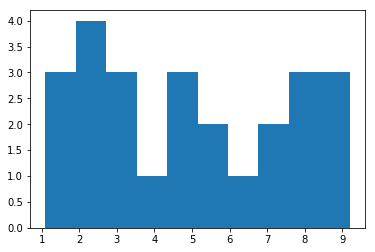

In [5]:
plt.hist(data['Hours'])
plt.show()

**Observation:** We can see that most of the students from the data spend **2 to 2.5** hours and the least amount of student spend **3.5 to 4.5** hours and **5.7 to 6.7** hours.

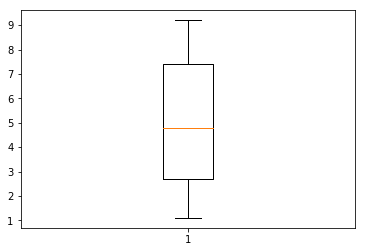

In [6]:
plt.boxplot(data['Hours'])
plt.show()

**Observation:** Fortunately there are no outliers in this column as we can see from the above diagram.

####  Scores <br>
We will analyze the scores column since this is our models labels.

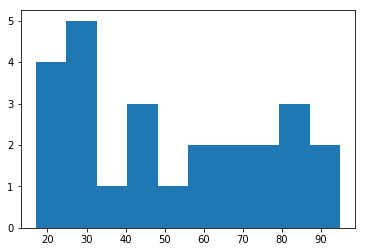

In [7]:
plt.hist(data['Scores'])
plt.show()

**Observation:** We can see that most of the students scored around 25 to 32 marks which is co-relating with the given score barplots.


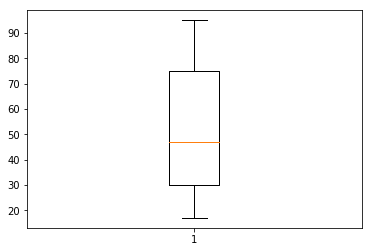

In [8]:
plt.boxplot(data['Scores'])
plt.show()

**Observation:** They are no outliers from the above boxxplot as we can see.
#### Visualization of dot plot of the dataset.

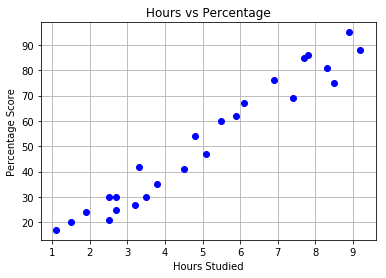

In [9]:
plt.plot(data['Hours'],data['Scores'], 'bo')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

**Observation:** We can see that the data points from hours and study are linear and we can apply linear models to the given data.

#### Preparing the dataset

In [10]:
X=data.drop('Scores',axis=1)
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [11]:
y=data['Scores']
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

## Splitting the data into train test and validation

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.20,random_state=0)

## Training our model:
We will be using linear regression through SGDRegressor for hyperparameter tuning. Here we tune alpha (regularization parameter) as the hyperparameter to get a optimal regression model.<br>
The loss function we will be using is RMSE (Root Mean Squared Error).<br>

In [13]:
def LinearRegression(X_train,y_train,X_val,y_val):
    alphas=[0.00001,0.0001,0.001,0.01,0.1]
    models={}
    for i in tqdm_notebook(alphas):
        model=SGDRegressor(alpha=i)
        model.fit(X_train,y_train)
        train_predictions=model.predict(X_train)
        val_predictions=model.predict(X_val)
        train_score=sqrt(metrics.mean_squared_error(y_train,train_predictions))
        val_score=sqrt(metrics.mean_squared_error(y_val,val_predictions))
        print("For alpha={} the train mean sqaured error and validation mean squared error is {} and {} respectively.".format(i,train_score,val_score))
        models[val_score]=model
    model_loss=min(models.keys()) 
    #print(model_loss)
    print("Optimal model:")
    print(models[model_loss])
    return models[model_loss]

In [14]:
best_model=LinearRegression(X_train,y_train,X_val,y_val)

For alpha=1e-05 the train mean sqaured error and validation mean squared error is 5.861407252336188 and 4.435176043198181 respectively.
For alpha=0.0001 the train mean sqaured error and validation mean squared error is 5.833781072916955 and 4.3620698861597935 respectively.
For alpha=0.001 the train mean sqaured error and validation mean squared error is 5.834073869501834 and 4.323672481227666 respectively.
For alpha=0.01 the train mean sqaured error and validation mean squared error is 5.966341351698453 and 4.520452240805695 respectively.
For alpha=0.1 the train mean sqaured error and validation mean squared error is 5.878837163692951 and 4.473555009941343 respectively.

Optimal model:
SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=Tru

In [15]:
test_predictions=best_model.predict(X_test)
test_score=sqrt(metrics.mean_squared_error(y_test,test_predictions))
print("The mean squared error for our test data is {}".format(test_score))

The mean squared error for our test data is 4.682389861541482


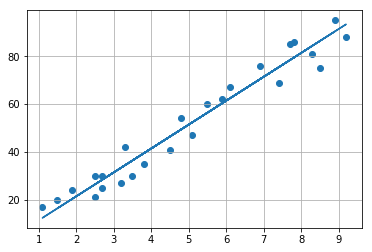

In [16]:
line = best_model.coef_*X+best_model.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.grid()
plt.show()

**Observation:** We can see that the models line fits perfectly to the linear data provided. This shows that our model is accurate visually.


#### Question:
What will be predicted score if a student study for 9.25 hrs in a
day?

In [17]:
query_ans=best_model.predict([[9.25],])
print("According to the algorithm if a student studied for 9.25 hours he would score ",query_ans[0],"%")

According to the algorithm if a student studied for 9.25 hours he would score  93.82283270370657 %


#### Ans:
Seems the student scores **93%** according to our model when he studies **9.25 hrs** in  day.

## Conclusion:
- We have explored the data through **univariate analysis**.
- Splitted the data into**train, validation and test**. 
- Used SGDRegressor for Linear Regression for **hyperparameter tuning of alpha**. 
- For Loss metrics we have used **Root Mean Squarred Error**.
- **Visulized** the models line if it is fitting perfectly to the given dataset.

 